# Tugas Pengganti UTS KS RPLD

Almas Fauzia Wibawa       17/409427/PA/17734

Dalam melakukan tugas ini, saya menggunakan Dataset A, yaitu bersumber dari: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports . Lebih tepatnya, saya menggunakan data jumlah kasus COVID-19 di seluruh dunia pada tanggal 22 Maret 2020. Data ini saya unduh pada tanggal 24 Maret 2020 pukul 22.51 WIB.

## 1. Exploratory Data Analysis

### a. Import Library

Yang pertama saya lakukan adalah meng-import library yang sekiranya akan saya gunakan dalam melakukan exploratory data analysis. Beberapa library yang akan saya gunakan adalah pandas (untuk mengolah datanya dalam bentuk data frame) dan seaborn (untuk memvisualisasikan data).

In [1]:
import pandas as pd
import seaborn as sns

### b. Meng-import dan Menyiapkan Data

Setelah library yang dibutuhkan di-import, yang dilakukan selanjutnya adalah memasukkan data yang ingin diolah ke dalam data frame menggunakan library pandas. Kemudian, agar lebih mudah dalam mengolahnya, data terlebih dahulu dipersiapkan sesuai dengan bagaimana data ini akan diolah.

In [2]:
df = pd.read_csv('03-22-2020.csv')
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-22T09:43:06,67800,3144,59433,30.9756,112.2707
1,NaN,Italy,2020-03-22T18:13:20,59138,5476,7024,41.8719,12.5674
2,NaN,Spain,2020-03-22T23:13:18,28768,1772,2575,40.4637,-3.7492
3,NaN,Germany,2020-03-22T23:43:02,24873,94,266,51.1657,10.4515
4,NaN,Iran,2020-03-22T14:13:06,21638,1685,7931,32.4279,53.6880
...,...,...,...,...,...,...,...,...
304,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
305,NaN,Puerto Rico,2020-03-22T22:43:02,0,1,0,18.2000,-66.5000
306,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560
307,NaN,The Bahamas,2020-03-19T12:13:38,0,0,0,24.2500,-76.0000


Pada kesempatan kali ini, saya ingin mengklasterisasi negara-negara yang terkena wabah COVID-19 berdasarkan jumlah kasus terkonfirmasinya, jumlah kematiannya, dan jumlah kasus sembuhnya. Oleh karena itu, terlebih dahulu saya menghapus kolom yang tidak akan saya butuhkan. Setelah itu, saya hitung total kasus, kematian, dan kasus sembuh di setiap negara. Hasil hitungan tersebut kemudian saya gantikan ke dalam data frame.

In [3]:
#Menghapus kolom yang tidak akan digunakan
df = df.drop(['Province/State', 'Last Update', 'Latitude', 'Longitude'], 1)

#Menghitung total kasus terkonfirmasi, jumlah kematian, dan jumlah kasus sembuh di setiap negara
country = list(df['Country/Region'])
confirmed = list(df['Confirmed'])
deaths = list(df['Deaths'])
recovered = list(df['Recovered'])

erased = 0
i = 0
merge = False
while i < len(country):
    for j in range(i):
        if country[i] == country[j]:
            country.pop(i)
            confirmed[j] += confirmed[i]
            confirmed.pop(i)
            deaths[j] += deaths[i]
            deaths.pop(i)
            recovered[j] += recovered[i]
            recovered.pop(i)
            merge = True
            erased += 1
            continue;
    if merge:
        merge = False
    else:
        i += 1

#Mengganti data pada data frame dengan total yang telah dihitung
n = len(country)
for i in range(n):
    df.loc[[i], 'Country/Region'] = country[i]
    df.loc[[i], 'Confirmed'] = confirmed[i]
    df.loc[[i], 'Deaths'] = deaths[i]
    df.loc[[i], 'Recovered'] = recovered[i]
df = df[:-erased]
df

,Country/Region,Confirmed,Deaths,Recovered
0,China,81397,3265,72362
1,Italy,59138,5476,7024
2,Spain,28768,1772,2575
3,Germany,24873,94,266
4,Iran,21638,1685,7931
...,...,...,...,...
178,Jersey,0,0,0
179,Puerto Rico,0,1,0
180,Republic of the Congo,0,0,0
181,The Bahamas,0,0,0


### c. Melakukan Exploratory Data Analysis

##### 1) Melihat tipe data setiap atribut

Agar saya dapat mengetahui cara memvisualisasikan data yang mana yang tepat, harus diketahui terlebih dahulu saya lihat tipe data dari seluruh kolom.

In [4]:
print(df.dtypes)

Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
dtype: object


Ternyata semua data merupakan bilangan bulat kecuali data "Country/Region" yang merupakan object. Tidak ada pula data kategorikal, melainkan seluruhnya adalah data kontinu.

##### 2) Melihat korelasi antar data

Setelah mengetahui tipe data dari setiap kolom yang ada pada data frame, mulai saya analisa korelasi antar kolomnya.

In [5]:
df.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.878638,0.774911
Deaths,0.878638,1.000000,0.578398
Recovered,0.774911,0.578398,1.000000


Dapat dilihat bahwa korelasi antara data kasus terkonfirmasi dengan kasus kematian adalah korelasi terdekat, dengan nilai 0.88. Diikuti oleh korelasi antara data kasus terkonfirmasi dengan kasus sembuh, dengan nilai 0.77. Sedangkan, kasus kematian dan kasus sembuh tidak begitu dekat korelasinya, hanya bernilai 0.58.

Agar lebih jelas, saya melihat korelasi antar data dengan plot. Pertama-tama, saya lihat plot antara data terkonfirmasi dengan data kematian.

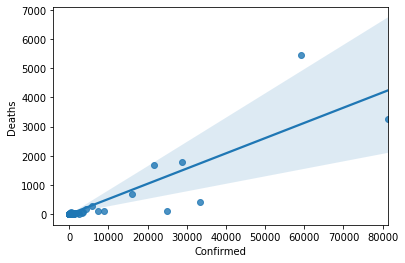

In [6]:
sns.regplot(x = 'Confirmed', y = 'Deaths', data = df)

Dari gambar, terlihat bahwa tidak semua negara dengan jumlah kasus terkonfirmasi tinggi memiliki angka kematian yang tinggi pula. Ini menunjukkan tidak berkorelasi penuhnya kedua data tersebut.

Selanjutnya, saya lihat plot antara data kasus terkonfirmasi dengan kasus sembuh.

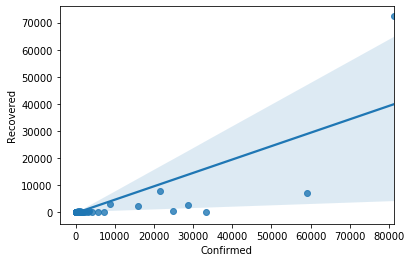

In [7]:
sns.regplot(x = 'Confirmed', y = 'Recovered', data = df)

Data kasus sembuh lebih tidak berkorelasi daripada data kematian apabila dihubungkan dengan data kasus terkonfirmasi. Dapat dilihat bahwa lebih banyak titik yang tidak semakin ke atas seiring dnegan semakin ke kanan posisinya (semakin banyak kasus terkonfirmasi tidak selalu diikuti dengan semakin besar nilai kasus sembuhnya).

Kemudian, kita lihat plot untuk data kasus kematian dengan kasus sembuh.

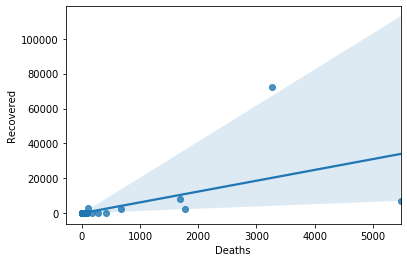

In [8]:
sns.regplot(x = 'Deaths', y = 'Recovered', data = df)

Garis korelasi semakin landai, menandakan bahwa semakin besarnya angka kematian kerap kali tidak diiringi dengan semakin tinggi pula kasus sembuh. Ini membuktikan juga cukup rendahnya nilai korelasi antara kedua data ini.

##### 3) Melihat statistik data

In [9]:
df.describe()

,Confirmed,Deaths,Recovered
count,183.000000,183.000000,183.000000
mean,1835.830601,79.967213,534.874317
std,8459.978243,504.053459,5404.783933
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,66.000000,0.000000,1.000000
75%,347.500000,3.000000,7.500000
max,81397.000000,5476.000000,72362.000000


Dari sini, saya dapat berasumsi mengenai sebaran datanya. Yang pertama, data kasus terkonfirmasi. Nilai minimalnya adalah 0, maksimalnya adalah 81397, dan rata-ratanya adalah 1835.83. Untuk kasus kematian, minimalnya 0, maksimalnya 5476, dan rata-ratanya 79.97. Sedangkan, untuk kasus sembuh, minimalnya 0, maksimalnya 72362, dan rata-ratanya 534.87. Dari ketiga data tersebut, terlihat bahwa nilai maksimal dengan nilai rata-ratanya timpang jauh. Timpang jauhnya nilai maksimal dengan rata-rata ini dapat menandakan bahwa data yang kita punya ini tidak rata sebarannya atau bisa juga karena terdapat beberapa outlier.

Selain itu, dari sini, saya juga dapat ketahui jumlah data yang saya punya. Tertera bahwa jumlah data yang saya punya ada 183 data. Data ini sebenarnya tergolong sedikit jika akan digunakan untuk proses training dan test.

Dari beberapa analisa yang telah dilakukan di atas, dapat disimpulkan bahwa data ini tidak begitu bagus digunakan untuk proses data science atau data mining. Sebaran data ini tidak merata. Korelasi antar atributnya pun tidak begitu bagus. Jumlah datanya sedikit. Walaupun begitu, akan tetap saya coba gunakan data ini untuk proses data mining yang akan dilakukan di langkah selanjutnya.

## 2. Data Mining

Proses data mining yang ingin saya coba lakukan kali ini adalah proses clustering dengan metode KMeans. Akan dikelompokkan setiap negara pada data berdasarkan jumlah kasus terkonfirmasi, kasus kematian, dan kasus sembuh yang dimiliki setiap negara tersebut. Data yang dijadikan parameter merupakan data numerik dan saya berasumsi bahwa kelompok yang terbentuk adalah kelompok negara berdasarkan seberapa besar dampak yang mereka terima akibat dari wabah COVID-19 ini. Tingkat besar kecilnya dampak diukur dari konteks, yaitu didasarkan pada dampak yang diterima oleh negara lain juga. Oleh karena itu, dipilih lah metode KMeans yang mengelompokkan data berdasarkan jarak datanya.

### a. Import Library

Yang pertama saya lakukan adalah meng-import library yang sekiranya akan saya butuhkan dalam proses data mining ini. Saya akan membutuhkan pyplot pada matplotlib untuk memvisualisasikan data, numpy untuk mengolah array, dan KMeans dari sklearn.cluster untuk melakukan clustering-nya.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### b. Memasukkan Data pada Numpy Array

Data dimasukkan pada numpy array agar mempermudah saya dalam mengolahnya. Library clustering yang saya gunakan juga membutuhkan numpy array dalam input datanya. Pada proses kali ini, saya masukkan data kasus terkonfirmasi, kasus kematian, dan kasus sembuh ke dalam satu array bernama points.

In [11]:
points = np.stack([df['Confirmed'], df['Deaths'], (-1)*df['Recovered']], axis = 1)

Data sembuh dikalikan dengan (-1) karena bertolakbelakangnya nilai dampak yang direpresentasikan, berbeda dengan data kasus terkonfirmasi dengan kasus kematian. Kasus terkonfirmasi dan kematian merupakan dampak negatif, sedangkan kasus sembuh merupakan tanda positif akan kebangkitan suatu negara dari dampak negatif tersebut.

### c. Melakukan Clustering

Dengan library KMeans dari sklearn.clustering, saya hanya perlu inisiasi variabel KMeans dengan jumlah klaster yang akan dibentuk. Pada kasus ini, saya ingin membuat 3 klaster yang diasumsikan terbentuk berdasarkan dampak wabah COVID-19. Hipotesisnya, akan terbentuk kelompok terdampak rendah, sedang, dan tinggi.

In [12]:
kMeans = KMeans(n_clusters = 3)
kMeans.fit(points)
print(kMeans.cluster_centers_)
y_km = kMeans.fit_predict(points)

[[ 3.35386000e+04  1.88880000e+03 -3.59480000e+03]
 [ 4.90774011e+02  1.08757062e+01 -4.26327684e+01]
 [ 8.13970000e+04  3.26500000e+03 -7.23620000e+04]]


Yang ditampilkan di atas adalah titik pusat setiap klaster setelah dilakukan clustering. Informasi mengenai klaster yang dimiliki setiap data disimpan dalam variabel y_km.

### d. Memasukkan Data Klaster ke dalam Data Frame

Saya ingin melihat apakah asumsi dan hipotesis saya sesuai. Pada data ini, tidak ada pengelompokan yang dilakukan sebelumnya, sehingga tidak dapat dilakukan evaluasi berdasarkan convolution matrix. Karena data yang saya olah terhitung sedikit, yaitu 183 data, saya memilih untuk mencoba memperhatikan setiap datanya. Agar lebih mudah dalam mengobservasinya, dimasukkan data klaster yang didapat setiap negara ke dalam data frame yang saya punya tadi. Saya tambahkan kolom bernama "Damage Class" untuk menampung data klaster hasil clustering.

In [13]:
df['Damage Class'] = y_km

Agar lebih mudah diobservasinya, data diurutkan. Baris dan kolom maksimal pada pandas ketika akan menampilkan data juga saya matikan agar terlihat semua ke-183 datanya.

In [14]:
df.sort_values(by = ['Recovered'], inplace = True, ascending = False)
df.sort_values(by = ['Deaths'], inplace = True, ascending = False)
df.sort_values(by = ['Confirmed'], inplace = True, ascending = False)
df.sort_values(by = ['Damage Class'], inplace = True, ascending = False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,Country/Region,Confirmed,Deaths,Recovered,Damage Class
0,China,81397,3265,72362,2
6,US,33276,417,178,1
2,Spain,28768,1772,2575,1
3,Germany,24873,94,266,1
4,Iran,21638,1685,7931,1
1,Italy,59138,5476,7024,1
127,Mayotte,11,0,0,0
118,Jamaica,16,1,2,0
119,Togo,16,0,1,0
120,Kenya,15,0,0,0


Setelah dilihat, ternyata, klaster yang dihasilkan oleh proses clustering dengan KMeans tadi tidak konsisten terhadap banyaknya kasus terkonfirmasi, kasus kematian, dan kasus sembuh pada suatu negara. Tentu saja, ini mungkin disebabkan karena tidak terlalu bagusnya data yang digunakan. Kekurangan data ini akan belum adanya pengelompokan yang dilakukan secara manual untuk menilai apakah clustering yang dilakukan sudah cukup akurat juga menjadi penyebab. Pengelompokan manual dapat digunakan untuk proses learning, sehingga clustering dapat dilakukan berulang-ulang dengan kualitas pengelompokan yang semakin baik di setiap iterasinya.